In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

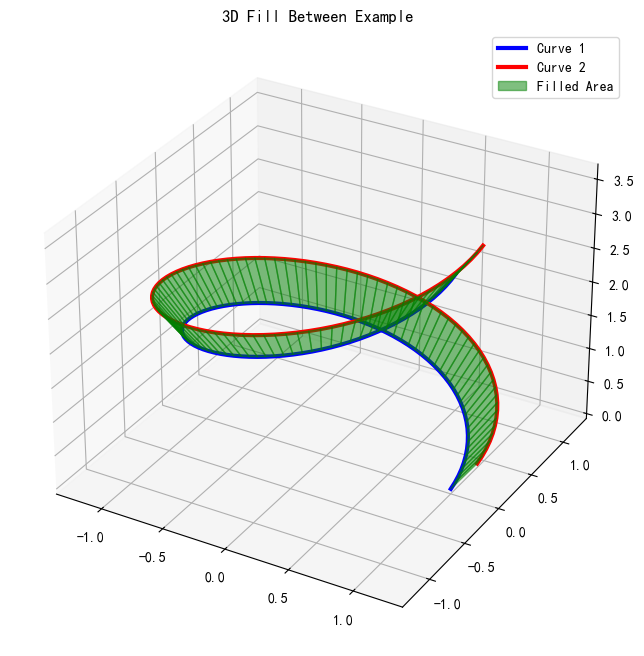

In [3]:
# 创建图形对象，添加3D子图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成数据
t = np.linspace(0, 2*np.pi, 100)
x1 = np.cos(t)
y1 = np.sin(t)
z1 = t/2
x2 = np.cos(t) * 1.2
y2 = np.sin(t) * 1.2
z2 = t/2 + 0.5

# 绘制两条3D曲线
ax.plot(x1, y1, z1, 'b-', linewidth=3, label='Curve 1')
ax.plot(x2, y2, z2, 'r-', linewidth=3, label='Curve 2')

# 填充两条曲线之间的区域
ax.fill_between(x1, y1, z1,         # 第一条曲线的坐标
                x2, y2, z2,         # 第二条曲线的坐标
                alpha=0.5,          # 透明度
                color='green',      # 填充颜色
                label='Filled Area' # 填充区域的图例标签
               ) 


ax.legend()
ax.set_title('3D Fill Between Example')
plt.show()

# 2、使用示例：

### 示例 1：使用条件填充

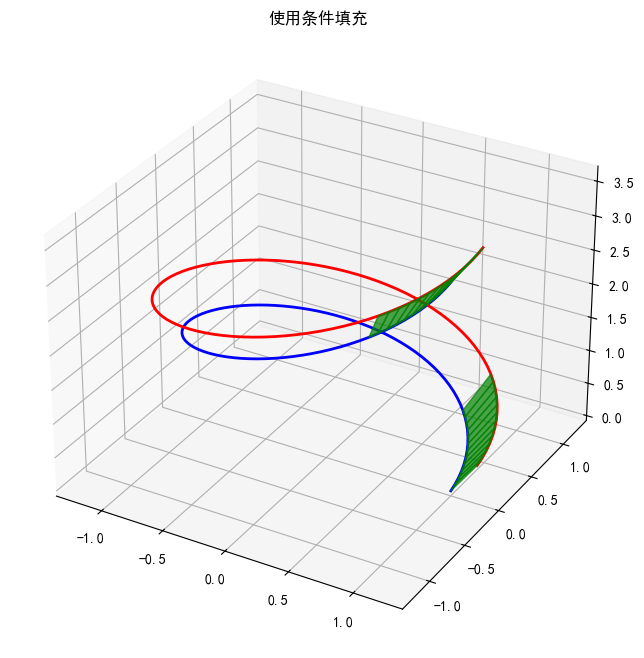

In [4]:
# 创建图形对象，添加3D子图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建数据
t = np.linspace(0, 2*np.pi, 100)
x1 = np.cos(t)
y1 = np.sin(t)
z1 = t/2

x2 = np.cos(t) * 1.2
y2 = np.sin(t) * 1.2
z2 = t/2 + 0.5

# 创建条件填充的布尔数组
where_condition = ((t >= 0) & (t <= np.pi/4)) | ((t >= 7*np.pi/4) & (t <= 2*np.pi))
# 填充两条曲线之间的区域，但只在where_condition为True的位置填充
ax.fill_between(x1, y1, z1,             # 第一条曲线的坐标
                x2, y2, z2,             # 第二条曲线的坐标
                where=where_condition,  # 填充条件：只填充t > π的部分
                alpha=0.7,              # 透明度
                color='green'           # 填充颜色
               ) 

# 绘制两条3D曲线
ax.plot(x1, y1, z1, 'b-', linewidth=2)
ax.plot(x2, y2, z2, 'r-', linewidth=2)

ax.set_title('使用条件填充')
plt.show()

### 示例 2：自定义填充模式

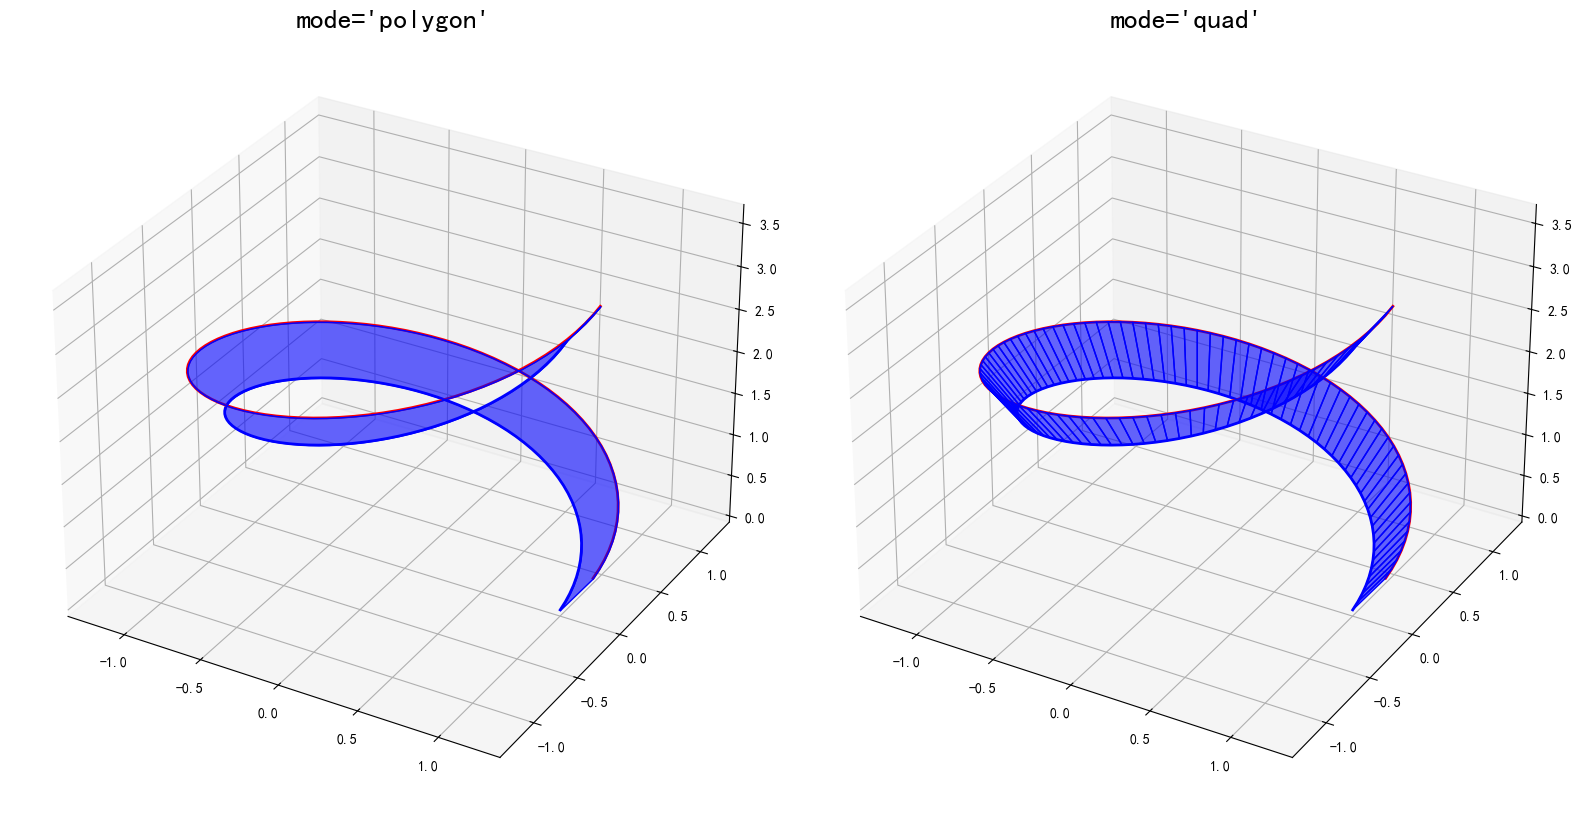

In [5]:
# 创建两条3D曲线
t = np.linspace(0, 2*np.pi, 100)
x1 = np.cos(t)
y1 = np.sin(t)
z1 = t/2

x2 = np.cos(t) * 1.2
y2 = np.sin(t) * 1.2
z2 = t/2 + 0.5

fig = plt.figure(figsize=(16, 8)) 

# 第一个子图 - polygon模式
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("mode='polygon'", fontsize=20)
ax1.fill_between(x1, y1, z1, x2, y2, z2,
                mode='polygon',
                color='blue',
                alpha=0.6)

# 第二个子图 - quad模式
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("mode='quad'", fontsize=20)
ax2.fill_between(x1, y1, z1, x2, y2, z2,
                mode='quad',
                color='blue',
                alpha=0.6)

# 在两个子图中绘制相同的曲线
for ax in [ax1, ax2]:
    ax.plot(x1, y1, z1, 'b-', linewidth=2)
    ax.plot(x2, y2, z2, 'r-', linewidth=2)

plt.tight_layout()
plt.show()

### 示例 3：为填充区域设置不同的颜色

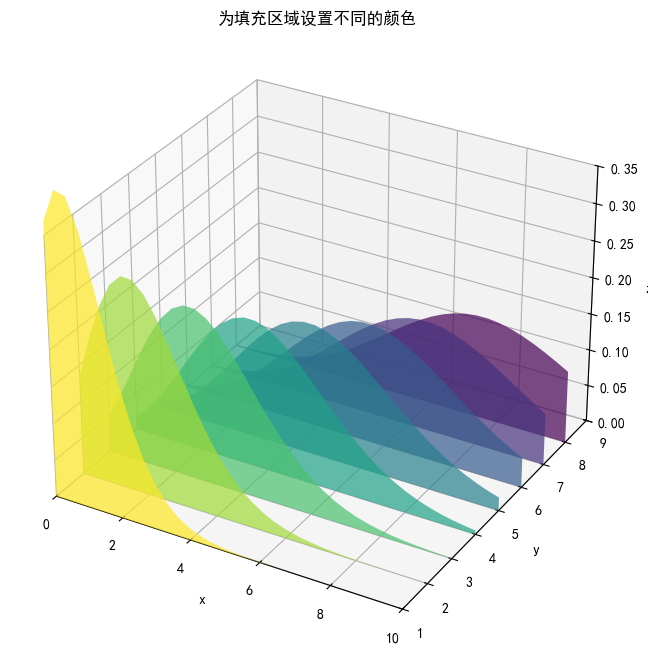

In [6]:
import math

# 将math.gamma函数向量化，使其可以处理numpy数组
gamma = np.vectorize(math.gamma)

# 设置参数
N = 31  # 采样点数量
x = np.linspace(0., 10., N)  # 在0到10之间均匀采样N个点作为x坐标
lambdas = range(1, 9)  # λ参数范围从1到8

# 创建图形，添加3D子图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建颜色映射，为每个λ值分配一个颜色
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(lambdas)))

# 遍历每个λ值
for i, l in enumerate(lambdas):
    # 使用fill_between填充3D区域
    # 参数说明：
    # 第一条曲线：(x, l, l**x * np.exp(-l) / gamma(x + 1)) - 这是泊松分布的概率质量函数
    # 第二条曲线：(x, l, 0) - 这是y=l平面上的直线
    ax.fill_between(x, l, l**x * np.exp(-l) / gamma(x + 1),
                    x, l, 0,
                    facecolors=facecolors[i], alpha=.7)

# 设置坐标轴
ax.set(xlim=(0, 10),
       ylim=(1, 9),
       zlim=(0, 0.35),
       xlabel='x', 
       ylabel='y', 
       zlabel='z')

# 设置图形标题
ax.set_title('为填充区域设置不同的颜色')

plt.show()